In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Q6. Assume a linear model and add 0-mean Gaussian noise to generate 100 samples.

In [63]:
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2.5 * x.flatten() + np.random.normal(0, 1, size=100)

a. Divide your sample into training and testing sets (80:20).

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

b. Use linear regression (from the sklearn package) for the training half. Compute the mean
squared error (MSE) on the testing set.

In [65]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.3f}")

Linear Regression MSE: 1.317


c. Plot the fitted model along with the data.

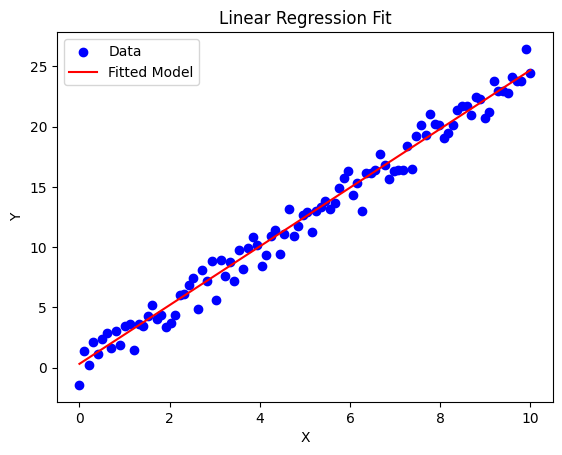

In [66]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, linear_model.predict(x), color='red', label='Fitted Model')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

d. Repeat the same for polynomials of degrees 2 and 3 as well.

Polynomial Regression (Degree 2) MSE: 1.374


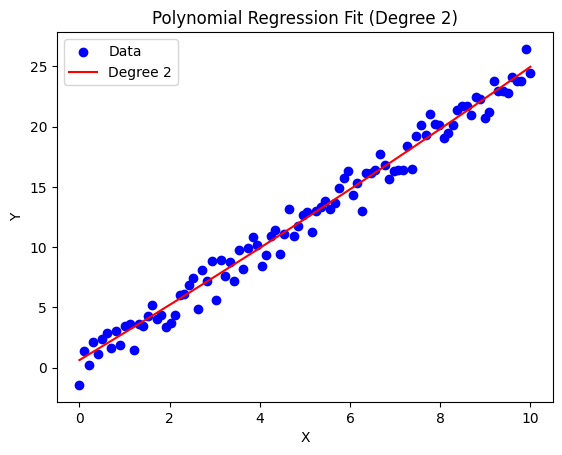

Polynomial Regression (Degree 3) MSE: 1.420


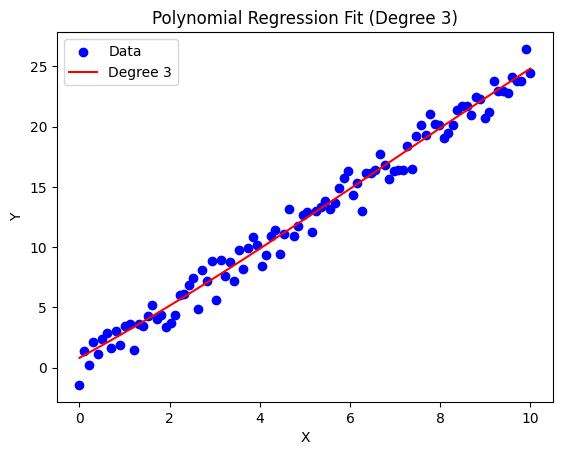

In [67]:
for deg in [2, 3]:
    poly_feat = PolynomialFeatures(degree=deg)
    x_train_poly = poly_feat.fit_transform(x_train)
    x_test_poly = poly_feat.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_test_pred = model.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"Polynomial Regression (Degree {deg}) MSE: {mse:.3f}")

    plt.scatter(x, y, color='blue', label='Data')
    x_all_poly = poly_feat.transform(x)
    plt.plot(x, model.predict(x_all_poly), color='red', label=f'Degree {deg}')
    plt.title(f'Polynomial Regression Fit (Degree {deg})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

Q7. Implement logistic regression using dataset A2_
P2.csv. Write a code for the gradient method with
learning rates of 0.01 and 0.05. For each learning rate:

In [68]:
import io
import pandas as pd
from google.colab import files

In [69]:
uploaded = files.upload()

Saving A2_P2.csv to A2_P2 (2).csv


In [70]:
df = pd.read_csv('A2_P2.csv')
x = df[['Feature 1', 'Feature 2']].values
y = df['Output'].values
x = np.column_stack([np.ones(len(x)), x])

a. Minimize mean square error and plot its variation for 20 iterations

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def mse_gradient_descent(x, y, lr, iterations):
    w = np.zeros(x.shape[1])
    mse_history = []

    for i in range(iterations):
        pred = sigmoid(x.dot(w))
        mse = np.mean((y - pred) ** 2)
        mse_history.append(mse)

        grad = x.T.dot(pred - y) / len(y)
        w -= lr * grad

    return w, mse_history

def ll_gradient_descent(x, y, lr, iterations):
    w = np.zeros(x.shape[1])
    ll_history = []

    for i in range(iterations):
        pred = sigmoid(x.dot(w))
        pred = np.clip(pred, 1e-15, 1-1e-15)
        ll = np.sum(y * np.log(pred) + (1-y) * np.log(1-pred))
        ll_history.append(ll)

        grad = x.T.dot(y - pred) / len(y)
        w += lr * grad

    return w, ll_history

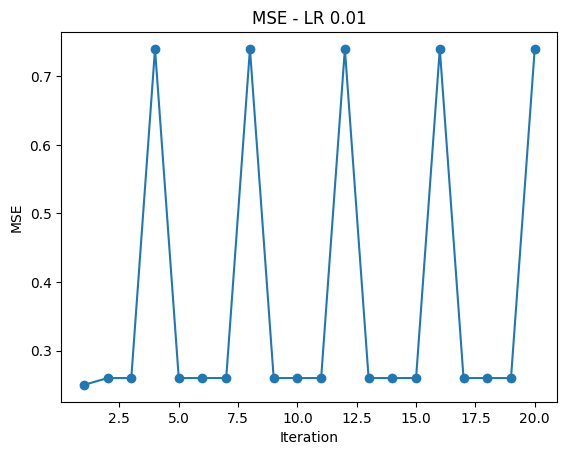

Final weights: [-3.000e-03  4.541e-02 -4.675e+02]


In [72]:
w1, mse1 = mse_gradient_descent(x, y, 0.01, 20)

plt.plot(range(1, 21), mse1, 'o-')
plt.title('MSE - LR 0.01')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

print(f"Final weights: {w1}")

b. Maximize log-likelihood and plot its variation for 20 iterations.

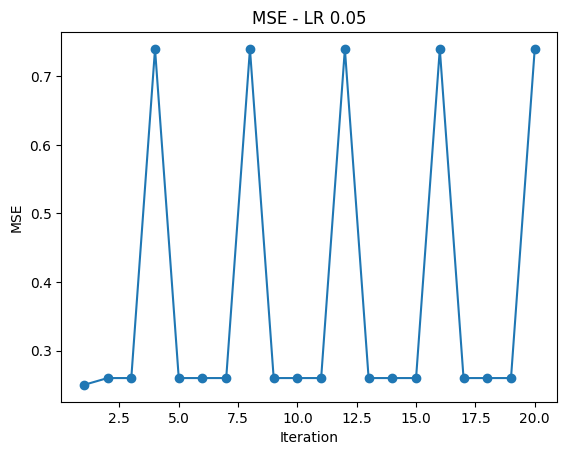

Final weights: [-1.5000e-02  2.2705e-01 -2.3375e+03]


In [73]:
w2, mse2 = mse_gradient_descent(x, y, 0.05, 20)

plt.plot(range(1, 21), mse2, 'o-')
plt.title('MSE - LR 0.05')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

print(f"Final weights: {w2}")

c. Specify the final weight values for both methods.

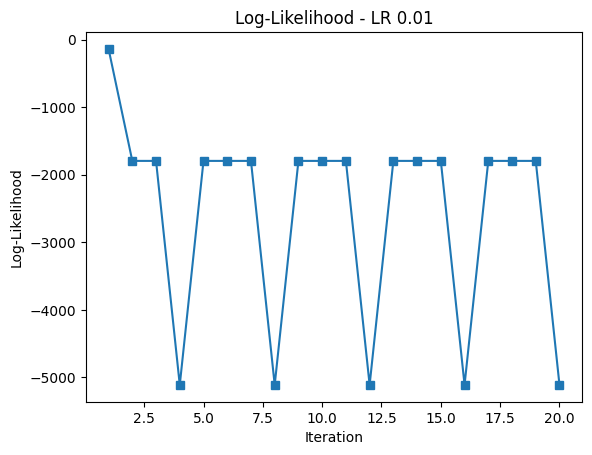

Final weights: [-3.000e-03  4.541e-02 -4.675e+02]


In [74]:
w3, ll1 = ll_gradient_descent(x, y, 0.01, 20)

plt.plot(range(1, 21), ll1, 's-')
plt.title('Log-Likelihood - LR 0.01')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.show()

print(f"Final weights: {w3}")

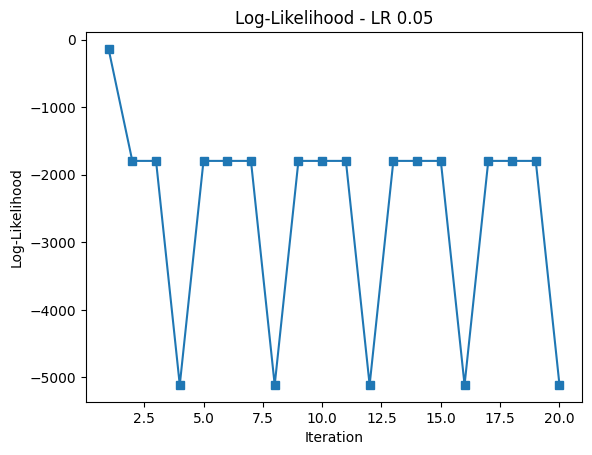

Final weights: [-1.5000e-02  2.2705e-01 -2.3375e+03]


In [75]:
w4, ll2 = ll_gradient_descent(x, y, 0.05, 20)

plt.plot(range(1, 21), ll2, 's-')
plt.title('Log-Likelihood - LR 0.05')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.show()

print(f"Final weights: {w4}")

In [76]:
print("FINAL WEIGHTS:")
print(f"MSE LR=0.01: {w1}")
print(f"MSE LR=0.05: {w2}")
print(f"LL LR=0.01:  {w3}")
print(f"LL LR=0.05:  {w4}")

FINAL WEIGHTS:
MSE LR=0.01: [-3.000e-03  4.541e-02 -4.675e+02]
MSE LR=0.05: [-1.5000e-02  2.2705e-01 -2.3375e+03]
LL LR=0.01:  [-3.000e-03  4.541e-02 -4.675e+02]
LL LR=0.05:  [-1.5000e-02  2.2705e-01 -2.3375e+03]


Q8. Write a code to implement regression models using dataset A2_P3.csv. Divide the dataset into
training and testing sets (80:20). Implement the following models using the training dataset and
compute MSE on the test dataset:

In [77]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from google.colab import files

In [78]:
uploaded = files.upload()

Saving A2_P3.csv to A2_P3 (3).csv


In [79]:
data = pd.read_csv('A2_P3.csv')
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

a. Linear regression.

In [80]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.3f}")
coefficients_linear = linear_model.coef_

Linear Regression MSE: 21.581


b. Linear regression with LASSO regularization (𝜆
/2
= 1).

In [81]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(x_train, y_train)

y_pred_lasso = lasso_model.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"LASSO Regression MSE: {mse_lasso:.3f}")
coefficients_lasso = lasso_model.coef_

LASSO Regression MSE: 27.045


c. Linear regression with ridge regularization (𝜆
/2
= 0.1).

In [82]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

y_pred_ridge = ridge_model.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.3f}")
coefficients_ridge = ridge_model.coef_

Ridge Regression MSE: 21.570


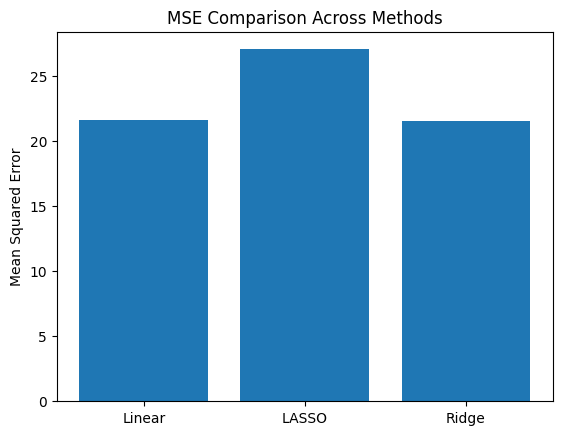

In [83]:
# Comparing MSEs using a bar plot
methods = ['Linear', 'LASSO', 'Ridge']
mses = [mse_linear, mse_lasso, mse_ridge]

plt.bar(methods, mses)
plt.title("MSE Comparison Across Methods")
plt.ylabel("Mean Squared Error")
plt.show()

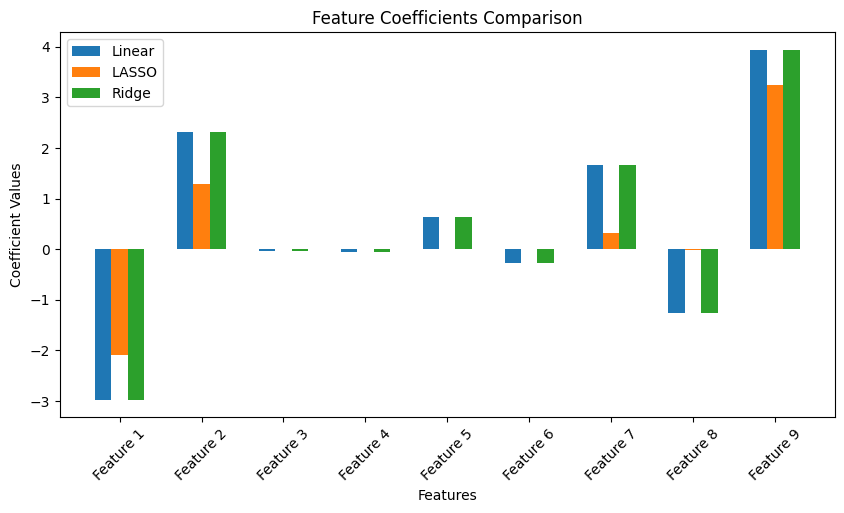

In [84]:
# Feature Coefficients Comparison Plot
plt.figure(figsize=(10, 5))
x_labels = [f"Feature {i+1}" for i in range(len(coefficients_linear))]
width = 0.2  # Width of bars
x = np.arange(len(x_labels))  # Label locations

plt.bar(x - width, coefficients_linear, width, label="Linear")
plt.bar(x, coefficients_lasso, width, label="LASSO")
plt.bar(x + width, coefficients_ridge, width, label="Ridge")

plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Feature Coefficients Comparison")
plt.legend()
plt.show()